In [101]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import Imputer
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor

In [102]:
dengue_features_train = "dengue_features_train.csv"
dengue_labels_train = "dengue_labels_train.csv"

x_train = pd.read_csv(dengue_features_train, index_col=[0])
y_train = pd.read_csv(dengue_labels_train, index_col=[0])

# Seperate data for San Juan
sj_train_features = x_train.loc['sj']
sj_train_labels = y_train.loc['sj']

# Separate data for Iquitos
iq_train_features = x_train.loc['iq']
iq_train_labels = y_train.loc['iq']
w_sj = 52
w_iq = 5

In [103]:
#ax1 = sns.countplot(y_train['year'],label="Count")

In [104]:
#City and date indicators
# city – City abbreviations: sj for San Juan and iq for Iquitos
# week_start_date – Date given in yyyy-mm-dd format

# NOAA's GHCN daily climate data weather station measurements
# station_max_temp_c – Maximum temperature
# station_min_temp_c – Minimum temperature
# station_avg_temp_c – Average temperature
# station_precip_mm – Total precipitation
# station_diur_temp_rng_c – Diurnal temperature range

# PERSIANN satellite precipitation measurements (0.25x0.25 degree scale)
# precipitation_amt_mm – Total precipitation

# NOAA's NCEP Climate Forecast System Reanalysis measurements (0.5x0.5 degree scale)
# reanalysis_sat_precip_amt_mm – Total precipitation
# reanalysis_dew_point_temp_k – Mean dew point temperature
# reanalysis_air_temp_k – Mean air temperature
# reanalysis_relative_humidity_percent – Mean relative humidity
# reanalysis_specific_humidity_g_per_kg – Mean specific humidity
# reanalysis_precip_amt_kg_per_m2 – Total precipitation
# reanalysis_max_air_temp_k – Maximum air temperature
# reanalysis_min_air_temp_k – Minimum air temperature
# reanalysis_avg_temp_k – Average air temperature
# reanalysis_tdtr_k – Diurnal temperature range

# Satellite vegetation - Normalized difference vegetation index (NDVI) - NOAA's CDR Normalized Difference Vegetation Index (0.5x0.5 degree scale) measurements
# ndvi_se – Pixel southeast of city centroid
# ndvi_sw – Pixel southwest of city centroid
# ndvi_ne – Pixel northeast of city centroid
# ndvi_nw – Pixel northwest of city centroid

In [105]:
output = ['total_cases']
weather_station_measurements =  ['station_max_temp_c', 'station_min_temp_c', 'station_avg_temp_c',
     'station_precip_mm', 'station_diur_temp_rng_c']

satellite_precipitation_measurements = ['precipitation_amt_mm']

climate_forcast_measurements = ['reanalysis_sat_precip_amt_mm', 'reanalysis_dew_point_temp_k', 'reanalysis_air_temp_k', 
                          'reanalysis_relative_humidity_percent', 'reanalysis_specific_humidity_g_per_kg', 
                          'reanalysis_precip_amt_kg_per_m2', 'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k', 
                          'reanalysis_avg_temp_k', 'reanalysis_tdtr_k']

ndvi_columns = ['ndvi_se', 'ndvi_sw', 'ndvi_ne', 'ndvi_nw']

all_data = pd.concat([sj_train_features, sj_train_labels], axis=1)

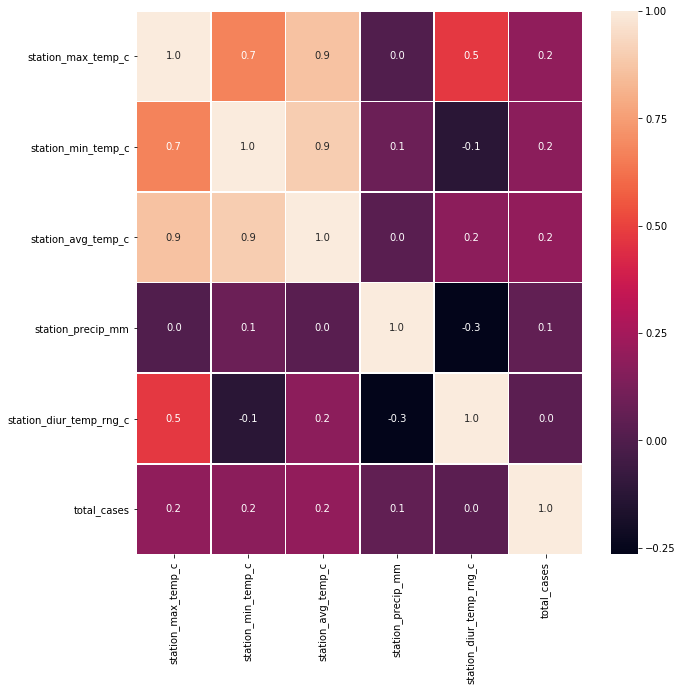

In [106]:
#corelation with weather measurements
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(all_data[weather_station_measurements +output].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

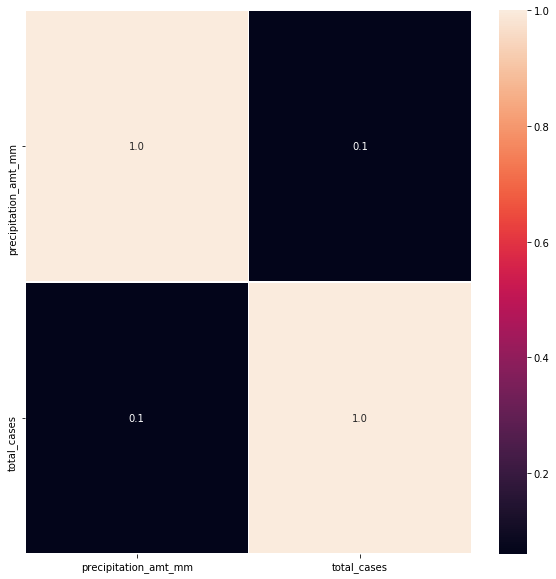

In [107]:
#corelation with satellite precipitation measurements
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(all_data[satellite_precipitation_measurements +output].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

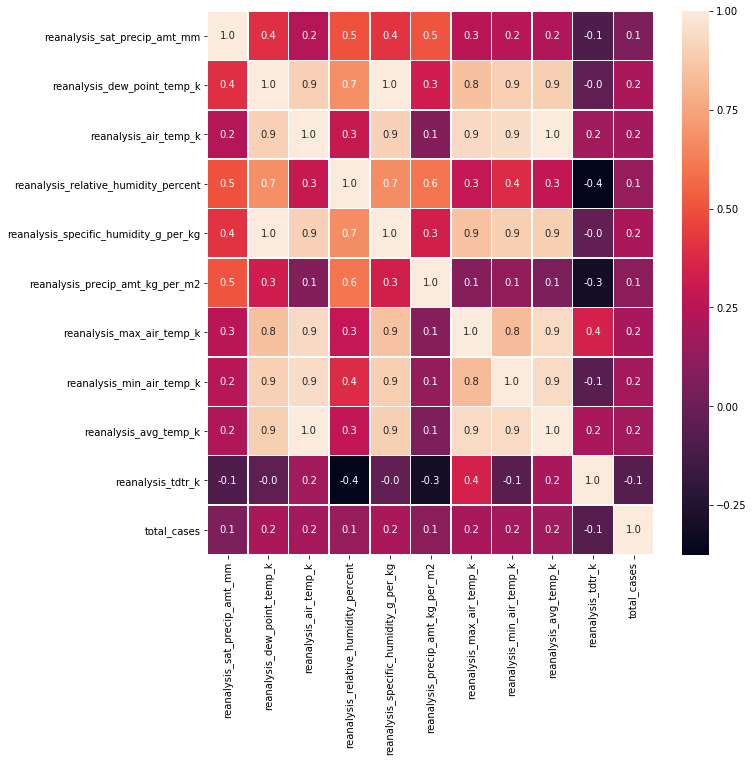

In [108]:
#corelation with climate forcast measurements
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(all_data[climate_forcast_measurements +output].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

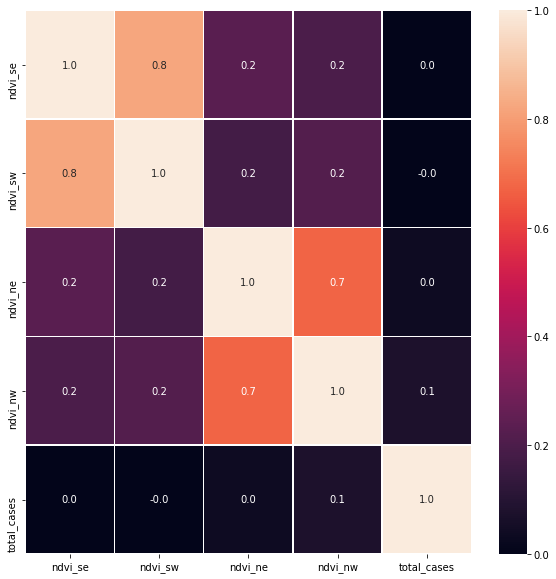

In [109]:
#corelation with ndvi columns
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(all_data[ndvi_columns +output].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [110]:
# correlation
sj_train_features['total_cases'] = sj_train_labels.total_cases
iq_train_features['total_cases'] = iq_train_labels.total_cases
sj_correlations = sj_train_features.corr()
iq_correlations = iq_train_features.corr()


C:\Users\vibodha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\vibodha\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


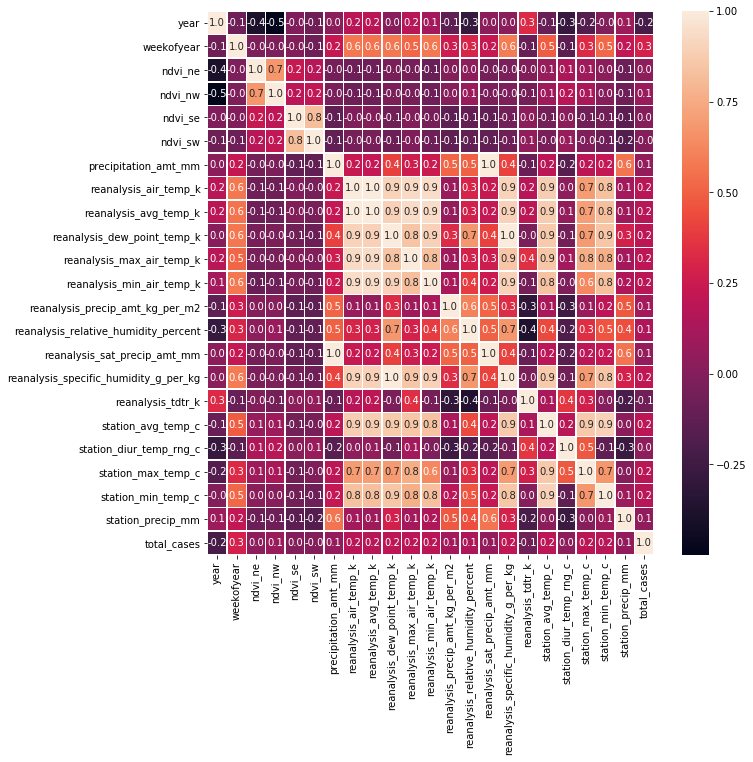

In [112]:
f,ax = plt.subplots(figsize=(10, 10))
sj_corr_heat = sns.heatmap(sj_correlations,annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [113]:
plt.savefig('sj_corr.png')

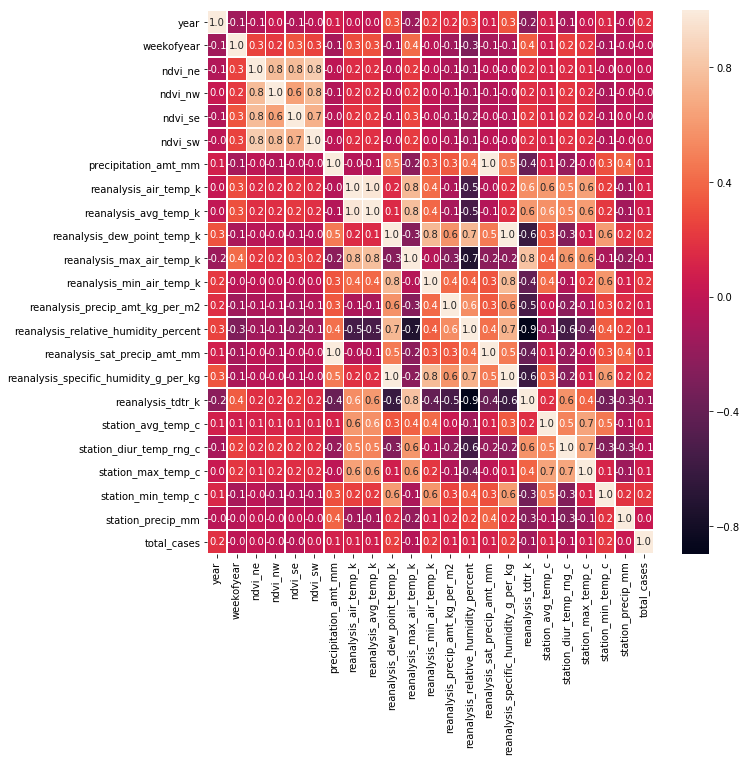

In [114]:
f,ax = plt.subplots(figsize=(10, 10))
iq_corr_heat = sns.heatmap(iq_correlations,annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.savefig('iq_corr.png')

In [ ]:
sj_train_features = sj_train_features.drop(['total_cases'],axis=1)
iq_train_features = iq_train_features.drop(['total_cases'],axis=1)

In [87]:
from sklearn.linear_model import LinearRegression, LogisticRegression
def monthResidualTrain(x,y):
    x['month'] = x['week_start_date'].apply(lambda date:int(date.to_datetime().month))
    lr = LinearRegression()
    X = pd.get_dummies(x['month'], prefix='month')
    Y = y.total_cases.values
    lr.fit(X, Y)
    return lr
    monthly_trend_train = pd.Series(lr.predict(X)).rolling(3, min_periods = 1).mean()
    #print(Y.head())
    #print(monthly_trend_train.head())
    residuals_train = Y - monthly_trend_train

In [88]:
def formatX(x) :
    
    
    # Add new columns
    avg_ndvi = x[ndvi_columns].mean(axis=1)
    x['ndvi_avg'] = avg_ndvi
        
    # Drop irrelevant columns
    x = x.drop(['week_start_date'] + ndvi_columns + satellite_precipitation_measurements, axis=1)
    x = x.drop(['station_max_temp_c', 'station_min_temp_c'],axis=1)
    
    # Processing categoricals
    #One hot encoding categoricals
    x = pd.get_dummies(x)
    #without categoricals
    x = x.select_dtypes(exclude=['object'])
    
    #cols_with_missing = [col for col in x.columns if x[col].isnull().any()]
    #not_null_columns = [col for col in list(x.columns) if col not in cols_with_missing]
    
    #col_missing_X = x[cols_with_missing].copy()
    #my_imputer = Imputer()
    #temp_X = pd.DataFrame(my_imputer.fit_transform(col_missing_X))
    #x = pd.concat([x[not_null_columns], temp_X], axis=1)
    
    x.fillna(method='ffill', inplace=True)
    
    return x


def pre_process_sj(x):
    avg_ndvi = x[ndvi_columns].mean(axis=1)
    x['ndvi_avg'] = avg_ndvi
    features = ['week_start_date','reanalysis_specific_humidity_g_per_kg', 
                 'reanalysis_dew_point_temp_k', 
                 'station_avg_temp_c',
               'precipitation_amt_mm','ndvi_avg']
    x = x[features]
    
    x['week_start_date'] = pd.to_datetime(x['week_start_date'])
    for i in range(1,5):
        x['quarter_' + str(i)] = x['week_start_date'].apply(lambda date: 1 if (
            ((i-1)*3<date.to_datetime().month) and (date.to_datetime().month <= i * 3)) else 0)
        features.append('quarter_' + str(i))

    x = x.drop(['week_start_date','quarter_1','quarter_3'],axis=1)
    
    #Moving averages
    x['station_avg_temp_c_movingMean'] = x['station_avg_temp_c'].rolling(window=w_sj).mean()
    x['precipitation_amt_mm_movingMean'] = x['precipitation_amt_mm'].rolling(window=w_sj).mean()
    x['reanalysis_specific_humidity_g_per_kg_movingMean'] = x['reanalysis_specific_humidity_g_per_kg'].rolling(window=w_sj).mean()
    x['reanalysis_dew_point_temp_k_movingMean'] = x['reanalysis_dew_point_temp_k'].rolling(window=w_sj).mean()
    x['ndvi_avg_movingMean'] = x['ndvi_avg'].rolling(window=10).mean()
    

    x.fillna(method='ffill', inplace=True)
    x = x.fillna(x.mean())
    
    x.to_csv("sj_formated.csv",index=False)
    return x[(w_sj-1):]


def pre_process_iq(x):
    
    avg_ndvi = x[ndvi_columns].mean(axis=1)
    x['ndvi_avg'] = avg_ndvi
    features = ['week_start_date','reanalysis_specific_humidity_g_per_kg', 
                 'reanalysis_dew_point_temp_k', 
                 'station_avg_temp_c',
               'precipitation_amt_mm','ndvi_avg']
    x = x[features]
    
    x['station_avg_temp_c_movingMean'] = x['station_avg_temp_c'].rolling(window=w_iq).mean()
    x['precipitation_amt_mm_movingMean'] = x['precipitation_amt_mm'].rolling(window=w_iq).mean()
    x['reanalysis_specific_humidity_g_per_kg_movingMean'] = x['reanalysis_specific_humidity_g_per_kg'].rolling(window=w_iq).mean()
    x['reanalysis_dew_point_temp_k_movingMean'] = x['reanalysis_dew_point_temp_k'].rolling(window=w_iq).mean()
    x['ndvi_avg_movingMean'] = x['ndvi_avg'].rolling(window=10).mean()
    
    x['week_start_date'] = pd.to_datetime(x['week_start_date'])
    for i in range(1,5):
        x['quarter_' + str(i)] = x['week_start_date'].apply(lambda date: 1 if (
            ((i-1)*3<date.to_datetime().month) and (date.to_datetime().month <= i * 3)) else 0)
        features.append('quarter_' + str(i))
    x = x.drop(['week_start_date','quarter_1','quarter_3'],axis=1)
    # fill missing values
    x.fillna(method='ffill', inplace=True)
    x = x.fillna(x.mean())

    # add labels to dataframe
    return x[(w_iq-1):]

C:\Users\vibodha\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\vibodha\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\vibodha\Anaconda3\lib\site-packages\pandas\core\series.py:2551: FutureWarning: to_datetime is deprecated. Use self.to_pydatetime()
  mapped = lib.map_infer(values, f, convert=convert_dtype)
C:\Users\vibodha\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to 

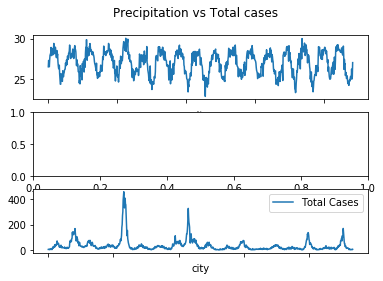

In [89]:


sj_train_features_formated = pre_process_sj(sj_train_features)

iq_train_features_formated = pre_process_iq(iq_train_features)

figs, axes = plt.subplots(nrows=3, ncols=1)

# sj_train_features_formated.pre_precipitation_amt_mm.plot(ax=axes[1], label="Precipitation")
sj_train_features_formated.station_avg_temp_c.plot(ax=axes[0], label="Temperature")
sj_train_labels.total_cases.plot(ax=axes[2], label="Total Cases")

plt.suptitle("Precipitation vs Total cases")
plt.legend()

# sj_train_features_formated.head()

In [90]:
sj_train_features['month'] = sj_train_features['week_start_date'].apply(lambda date:int(date.split('-')[1]))
random_sj = RandomForestRegressor(n_estimators=180,criterion='mae',max_depth=6,warm_start=True)
X = pd.get_dummies(sj_train_features['month'], prefix='month')
Y = sj_train_labels.total_cases.values
random_sj.fit(X, Y)
pred = random_sj.predict(X)
print("MAE : " + str(mean_absolute_error(Y, pred)))
monthly_trend_train = pd.Series(pred).rolling(9, min_periods = 1).mean()
sj_monthly_residual = Y - monthly_trend_train
forest_model_sj_monthly_residual = RandomForestRegressor(n_estimators=180,criterion='mae',max_depth=6,warm_start=True)
forest_model_sj_monthly_residual.fit(sj_train_features_formated, sj_monthly_residual[(w_sj-1):])

C:\Users\vibodha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


MAE : 21.748314339981007


RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=6,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=180, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=True)

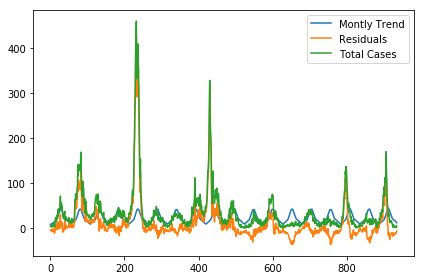

In [119]:
plt.plot(monthly_trend_train,label="Montly Trend")
plt.plot(sj_monthly_residual,label="Residuals")
plt.plot(Y,label="Total Cases")
plt.tight_layout()
plt.legend()
plt.show()

In [94]:
def train_randomForest(x_formated,y_train,city):
    # split data into training and validation data, for both predictors and target
    # The split is based on a random number generator. Supplying a numeric value to
    # the random_state argument guarantees we get the same split every time we
    # run this script.
    x, val_X, y, val_y = train_test_split(x_formated, y_train, test_size=0.1, random_state=0, shuffle=False)
    total_y = y[['total_cases'] ]
    total_y.fillna(method='ffill', inplace=True)
    if(city=="sj"):
        forest_model = RandomForestRegressor(n_estimators=180,criterion='mae',max_depth=6,warm_start=True)
    else:
        forest_model = RandomForestRegressor(n_estimators=50, max_features='auto',
                                 max_depth=6, min_samples_leaf=0.005,
                                 criterion='mae', min_weight_fraction_leaf=0.1
                                , warm_start=True)
    forest_model.fit(x, total_y)
    pred_val = forest_model.predict(val_X)
    print("MAE : " + str(mean_absolute_error(val_y['total_cases'], pred_val)))
    return forest_model

# print(sj_train_features_formated.head)
forest_model_sj = train_randomForest(sj_train_features_formated,sj_train_labels[(w_sj-1):],"sj")
forest_model_iq = train_randomForest(iq_train_features_formated,iq_train_labels[(w_iq-1):],"iq")

#forest_model_sj_monthly_residual = train_randomForest(sj_train_features_formated,sj_monthly_residual[51:],"sj")




C:\Users\vibodha\Anaconda3\lib\site-packages\pandas\core\frame.py:3035: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)
C:\Users\vibodha\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


MAE : 16.40496254681648


C:\Users\vibodha\Anaconda3\lib\site-packages\pandas\core\frame.py:3035: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)
C:\Users\vibodha\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


MAE : 3.781538461538461


In [74]:
def train_extraTrees(x_formated,y_train):
    # split data into training and validation data, for both predictors and target
    # The split is based on a random number generator. Supplying a numeric value to
    # the random_state argument guarantees we get the same split every time we
    # run this script.
    x, val_X, y, val_y = train_test_split(x_formated, y_train, test_size=0.1, random_state=0, shuffle=False)
    total_y = y[['total_cases'] ]
    total_y.fillna(method='ffill', inplace=True)
    extraTrees_model = ExtraTreesRegressor(n_estimators=180,criterion='mae',max_depth=6,warm_start=True)
    extraTrees_model.fit(x, total_y)
    pred_val = extraTrees_model.predict(val_X)
    print("MAE : " + str(mean_absolute_error(val_y['total_cases'], pred_val)))
    return extraTrees_model

# print(sj_train_features_formated.head)
extraTrees_model_sj = train_extraTrees(sj_train_features_formated,sj_train_labels[(w_sj-1):])
extraTrees_model_iq = train_extraTrees(iq_train_features_formated,iq_train_labels[(w_iq-1):])

C:\Users\vibodha\Anaconda3\lib\site-packages\pandas\core\frame.py:3035: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)
C:\Users\vibodha\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


MAE : 16.529837702871415


C:\Users\vibodha\Anaconda3\lib\site-packages\pandas\core\frame.py:3035: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)
C:\Users\vibodha\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


MAE : 4.1276175213675215


In [17]:
# from keras.models import Sequential
# from keras.layers.core import Dense, Activation
# from keras.layers.recurrent import LSTM
# from sklearn.preprocessing import MinMaxScaler


# def train_LSTM(x,y):
    
#     y = y.drop(['weekofyear','year'],axis=1)
    
#     x = x.astype('float32')
#     y = y.astype('float32')
    
#     scaler_x = MinMaxScaler(feature_range=(0, 1))
#     scaler_y = MinMaxScaler(feature_range=(0, 1))
    
#     x = scaler_x.fit_transform(x)
#     y = scaler_y.fit_transform(y)
    
#     x, val_X, y, val_y = train_test_split(x, y, test_size=0.1, random_state=0, shuffle=False)
    
#     x = x.reshape(x.shape[0], 1, x.shape[1])
#     val_X = val_X.reshape(val_X.shape[0], 1, val_X.shape[1])
    
#     model = Sequential()
#     model.add(LSTM(8, input_shape=(1, 8), return_sequences=True))
#     model.add(LSTM(1))
#     model.add(Dense(1))
    
#     model.compile(loss='mean_squared_error', optimizer='adam')
#     hist = model.fit(x, y, epochs=100, batch_size=10, verbose=2,
#           validation_data=(val_X, val_y))
    
#     plt.plot(hist.history['loss'], label='train_lose')
#     plt.plot(hist.history['val_loss'], label='test_lose')
#     plt.legend()
#     plt.show()
    
#     return model

# lstm_model_sj = train_LSTM(sj_train_features_formated,sj_train_labels)
# lstm_model_iq = train_LSTM(iq_train_features_formated,iq_train_labels)

In [18]:
def train_MPL(x,y):
    # split data into training and validation data, for both predictors and target
    # The split is based on a random number generator. Supplying a numeric value to
    # the random_state argument guarantees we get the same split every time we
    # run this script.
    x, val_X, y, val_y = train_test_split(x, y, test_size=0.1, random_state=0, shuffle=False)
    total_y = y[['total_cases'] ]
    total_y.fillna(method='ffill', inplace=True)
    regressor=MLPRegressor(hidden_layer_sizes=(100,100 ), activation='tanh', solver='adam', alpha=0.0001, batch_size='auto', 
                           learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, 
                           random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, 
                           nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, 
                           epsilon=1e-08)
    regressor.fit(x, total_y)
    pred_val = regressor.predict(val_X)
    print("MAE : " + str(mean_absolute_error(val_y['total_cases'], pred_val)))
    return regressor

mpl_model_sj = train_MPL(sj_train_features_formated,sj_train_labels)
mpl_model_iq = train_MPL(iq_train_features_formated,iq_train_labels)

C:\Users\vibodha\Anaconda3\lib\site-packages\pandas\core\frame.py:3035: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)
C:\Users\vibodha\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MAE : 21.28128382417292
MAE : 5.196713652046876


In [95]:
dengue_features_test = "dengue_features_test.csv"
x_test = pd.read_csv(dengue_features_test, index_col=[0])

sj_test_features = x_test.loc['sj']
iq_test_features = x_test.loc['iq']

# x_test.head()
sj_test_features_ = pd.concat([sj_train_features[(1-w_sj):],sj_test_features])
sj_test_formated = pre_process_sj(sj_test_features_)
iq_test_features_ = pd.concat([iq_train_features[(1-w_iq):],iq_test_features])
iq_test_formated = pre_process_iq(iq_test_features_)

# sj_test_features.head()

pred_sj = pd.Series(forest_model_sj_monthly_residual.predict(sj_test_formated))
#pred_sj = pred_sj.round().astype(int)

sj_test_features['month'] = sj_test_features['week_start_date'].apply(lambda date:int(date.split('-')[1]))
X_test = pd.get_dummies(sj_test_features['month'], prefix='month')
monthly_trend_test = pd.Series(random_sj.predict(X_test))
#monthly_trend_test = monthly_trend_test.round().astype(int)

sj_cases_pred = pd.Series(pred_sj + monthly_trend_test)
sj_cases_pred = sj_cases_pred.round().astype(int)
#sj_cases_pred = sj_cases_pred.apply(lambda x: 1 if x==None else ( 1 if x < 1 else int(x)))
sj_test_formated['total_cases'] = sj_cases_pred.values

# output_sj = pd.concat([sj_test_features[['city','year', 'weekofyear']], pred_sj], axis=1)

pred_iq = pd.Series(forest_model_iq.predict(iq_test_formated))
pred_iq = pred_iq.round().astype(int)


iq_test_formated['total_cases'] = pred_iq.values

# output_iq = pd.concat([iq_test_features[['city','year', 'weekofyear']], pred_iq], axis=1)


C:\Users\vibodha\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\vibodha\Anaconda3\lib\site-packages\pandas\core\series.py:2551: FutureWarning: to_datetime is deprecated. Use self.to_pydatetime()
  mapped = lib.map_infer(values, f, convert=convert_dtype)
C:\Users\vibodha\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\vibodha\Anaconda3\lib\site-packages\ipykernel_launcher.py:73: SettingWithCopyWarning: 
A value is trying to 

In [104]:
# dengue_features_test = "dengue_features_test.csv"
# x_test = pd.read_csv(dengue_features_test, index_col=[0])

# sj_test_features = x_test.loc['sj']
# iq_test_features = x_test.loc['iq']

# # x_test.head()

# sj_test_formated = pre_process_sj(sj_test_features)
# iq_test_formated = pre_process_iq(iq_test_features)

# # sj_test_features.head()
# sj_test_formated = sj_test_formated.astype('float32')
# scaler_x = MinMaxScaler(feature_range=(0, 1))
# sj_test_formated = scaler_x.fit_transform(sj_test_formated)
# sj_test_formated = sj_test_formated.reshape(sj_test_formated.shape[0], 1, sj_test_formated.shape[1])
# pred_sj = pd.DataFrame(lstm_model_sj.predict(sj_test_formated))
# pred_sj = pred_sj.round().astype(int)
# print (pred_sj.head)
# pred_sj.columns = ['total_cases']

# sj_test_formated['total_cases'] = pred_sj.total_cases

# # output_sj = pd.concat([sj_test_features[['city','year', 'weekofyear']], pred_sj], axis=1)
# iq_test_formated = iq_test_formated.reshape(iq_test_formated.shape[0], 1, iq_test_formated.shape[1])
# pred_iq = pd.DataFrame(lstm_model_iq.predict(iq_test_formated))
# pred_iq = pred_iq.round().astype(int)
# pred_iq.columns = ['total_cases']

# iq_test_formated['total_cases'] = pred_iq.total_cases

# # output_iq = pd.concat([iq_test_features[['city','year', 'weekofyear']], pred_iq], axis=1)

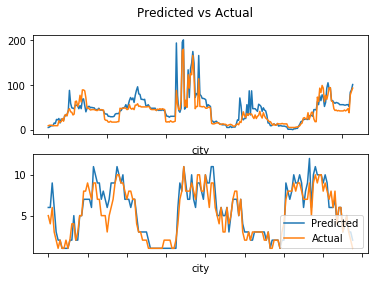

In [96]:
good = pd.read_csv("good_submission.csv", index_col=[0])

sj_good = good.loc['sj']
iq_good = good.loc['iq']

figs, axes = plt.subplots(nrows=2, ncols=1)

sj_test_formated.total_cases.plot(ax=axes[0], label="Predicted")
sj_good.total_cases.plot(ax=axes[0], label="Actual")

iq_test_formated.total_cases.plot(ax=axes[1], label="Predicted")
iq_good.total_cases.plot(ax=axes[1], label="Actual")

plt.suptitle("Predicted vs Actual")
plt.legend()

In [97]:

submission = pd.read_csv("submission_format.csv")
print (submission.shape)
print (pred_sj.shape)
print (pred_iq.shape)
pred = pd.concat([sj_test_formated,iq_test_formated])
submission.total_cases = pred.total_cases.values
submission.to_csv("trend_submission_1.3.csv",index=False)

(416, 4)
(260,)
(156,)
